### Setup

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
!pip install tensorflow_text
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 48.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.3 MB/s eta 0:00

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.3 MB/s eta 0:00:00


In [ ]:
!pip install -q -U watermark
!pip install -qq transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.0 MB/s eta 0:00:00


In [ ]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy       : 1.22.4
pandas      : 1.5.3
torch       : 2.0.1+cu118
transformers: 4.30.2



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax

In [ ]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

In [ ]:
from datasets import load_dataset

In [ ]:
# RANDOM_SEED = 42
# np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device

### Load Dataset and visualize

In [ ]:
datasets = load_dataset('Sp1786/multilabel-sentiment-dataset')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/Sp1786___csv/Sp1786--multilabel-sentiment-dataset-81c846ecb7cff9a3/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
train_ds = datasets['train']
val_ds = datasets['validation']
test_ds = datasets['test']

In [ ]:
train_df = pd. DataFrame(train_ds)
train_df.head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


{1: 11649, 2: 10478, 0: 9105}


<Axes: xlabel='sentiment', ylabel='count'>

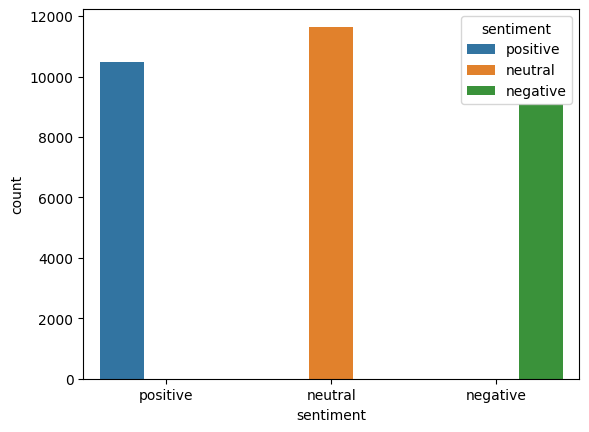

In [ ]:
counts = train_df.label.value_counts().to_dict()
print(counts)
sns.countplot(data=train_df, x='sentiment', hue="sentiment")

In [ ]:
val_df = pd. DataFrame(val_ds)
val_df.head()

,id,text,label,sentiment
0,317,Laying in bed til workkk... Oh the life. Defin...,0,negative
1,24292,ooohhh imma need you to get on that asap love...,2,positive
2,3513,"Thanks! I love it they have a video, so you d...",2,positive
3,4322,I left my ipod in the car so now its all warm.,2,positive
4,6203,Great app. Only complaint is that I'd like the...,2,positive


{1: 11649, 2: 10478, 0: 9105}


<Axes: xlabel='sentiment', ylabel='count'>

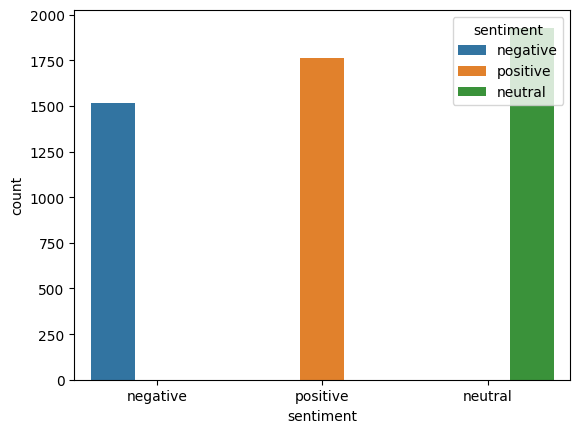

In [ ]:
print(counts)
sns.countplot(data=val_df, x='sentiment', hue="sentiment")

In [ ]:
test_df = pd. DataFrame(test_ds)
test_df.head()

,id,text,label,sentiment
0,9235,getting cds ready for tour,1,neutral
1,16790,"MC, happy mother`s day to your mom ;).. love yah",2,positive
2,24840,A year from now is graduation....i am pretty s...,0,negative
3,20744,because you had chips and sale w/o me,1,neutral
4,6414,Great for organising my work life balance,2,positive


{1: 11649, 2: 10478, 0: 9105}


<Axes: xlabel='sentiment', ylabel='count'>

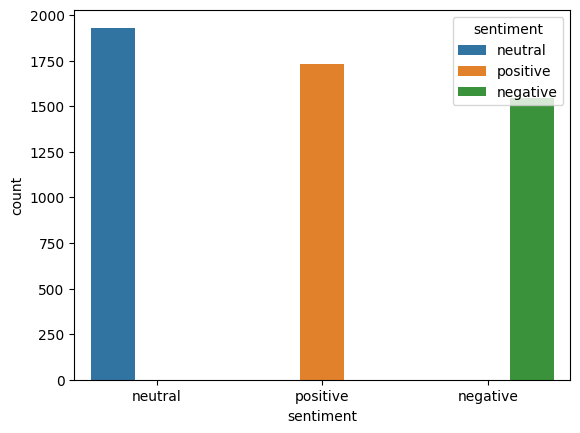

In [ ]:
print(counts)
sns.countplot(data=test_df, x='sentiment', hue="sentiment")

### Data Pre-Processing

In [ ]:
print(train_df.isnull().sum())
print(val_df.isnull().sum())
print(test_df.isnull().sum())

id           0
text         0
label        0
sentiment    0
dtype: int64
id           0
text         0
label        0
sentiment    0
dtype: int64
id           0
text         1
label        0
sentiment    0
dtype: int64


In [ ]:
# train_df = train_df.dropna()
# val_df = val_df.dropna()
test_df = test_df.dropna()

In [ ]:
print(train_df[train_df['text']==''])
print(val_df[val_df['text']==''])
print(test_df[test_df['text']==''])

Empty DataFrame
Columns: [id, text, label, sentiment]
Index: []
Empty DataFrame
Columns: [id, text, label, sentiment]
Index: []
Empty DataFrame
Columns: [id, text, label, sentiment]
Index: []


In [ ]:
# print(train_df.isnull().sum())
# print(val_df.isnull().sum())
print(test_df.isnull().sum())

id           0
text         0
label        0
sentiment    0
dtype: int64


<Axes: ylabel='Density'>

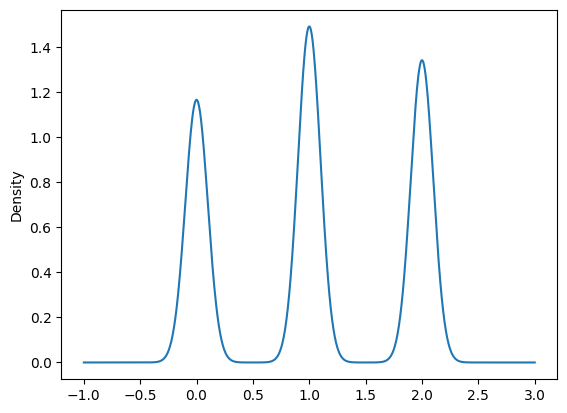

In [ ]:
train_df.label.plot.kde()

<Axes: ylabel='Density'>

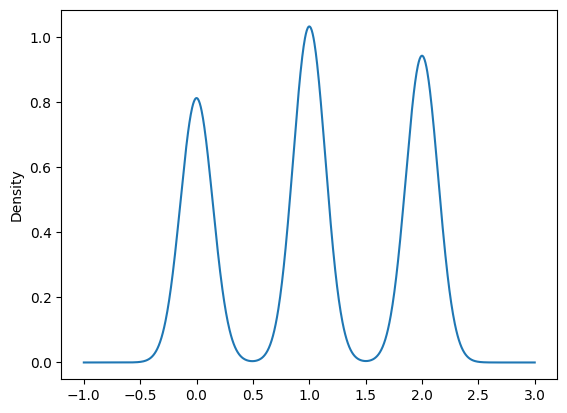

In [ ]:
val_df.label.plot.kde()

<Axes: ylabel='Density'>

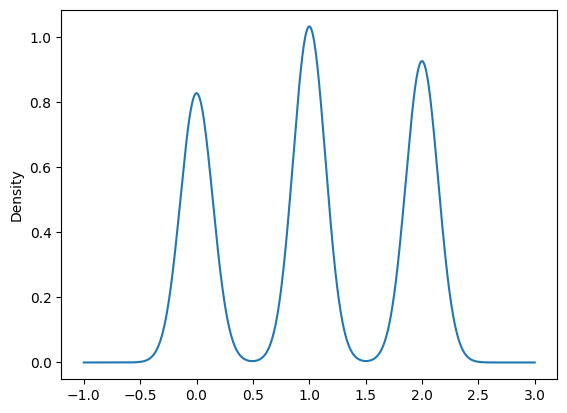

In [ ]:
test_df.label.plot.kde()

In [ ]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

### Model

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

### Prediction

In [ ]:
import re
def preprocess(text):
    new_text = []

    sentence = str(text)

    # remove non words
    sentence = re.sub(r"[^\w\s\']", "", sentence)

    # Multiple spaces removal
    sentence = re.sub(r" +", ' ', sentence)

    # Removing multiple spaces &
    for word in sentence.split(" "):
        word = '@user' if word.startswith('@') and len(word) > 1 else word
        word = 'http' if word.startswith('http') else word
        new_text.append(word)
    return " ".join(new_text)

In [81]:
def get_prediction(reviews):
  preds = []
  class_names=["negative", "neutral", "positive"]
  for review in reviews:
    review = preprocess(review)
    encoded_input = tokenizer(review, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()

    scores = softmax(scores)
    pred = class_names[np.argmax(scores)]
    preds.append(pred)
  return preds

In [82]:
preds = get_prediction(test_df.text)

### Perfomance

In [83]:
y = test_df.sentiment.to_list()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
print(classification_report(y, preds, target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.71      0.77      0.74      1546
     neutral       0.68      0.55      0.61      1929
    positive       0.73      0.84      0.78      1730

    accuracy                           0.71      5205
   macro avg       0.71      0.72      0.71      5205
weighted avg       0.71      0.71      0.70      5205



In [86]:
cm = confusion_matrix(y, preds)
cm

array([[1189,  272,   85],
       [ 419, 1055,  455],
       [  56,  222, 1452]])

In [87]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment')

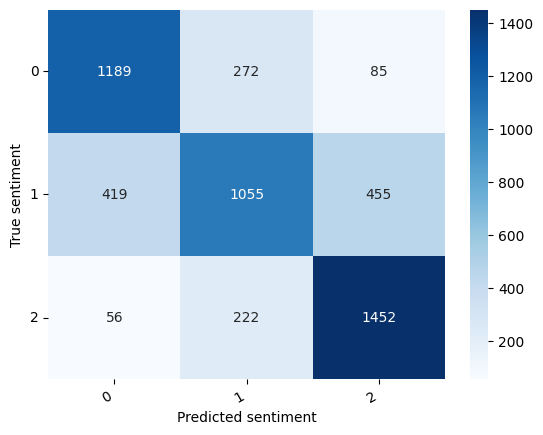

In [88]:
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [90]:
df_eval = pd.DataFrame({
    "true": y,
    "pred": preds
}, columns=["true", "pred"])

<Axes: xlabel='true', ylabel='count'>

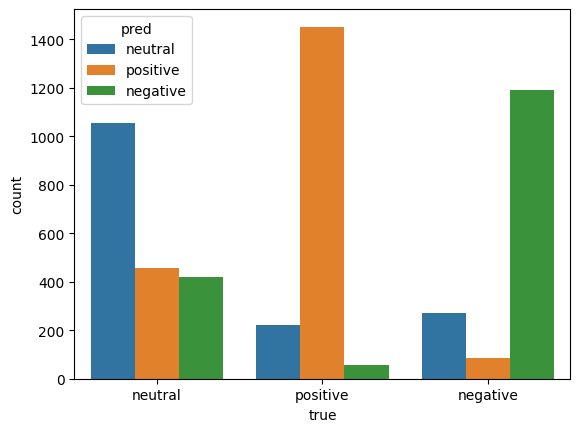

In [91]:
sns.countplot(data=df_eval, x="true", hue="pred")